# Exploring Transformers: Tokenization, Self-Attention, and Text Generation with BERT and GPT-2

## Introduction
Transformers have revolutionized the field of natural language processing (NLP). They have set new standards for language understanding, text generation, and other NLP tasks. This section explores three key concepts related to Transformers: **tokenization**, **self-attention**, and **text generation**. We will specifically focus on how these concepts are implemented and applied using two widely-used transformer models: **BERT** (Bidirectional Encoder Representations from Transformers) and **GPT-2** (Generative Pre-trained Transformer 2).

## 1. Tokenization
Tokenization is the process of splitting a sentence or text into smaller units (tokens). These tokens can be words, sub-words, or characters, and they serve as the basic units that models process to understand and generate language.

### **BERT Tokenization**
- **BERT** uses a **WordPiece tokenizer**, which breaks words into subword units based on frequency and usage in the training data.
- For example, a word like "unhappiness" may be split into "un", "happiness" or even smaller units if the word isn't frequent enough in the corpus.

### **GPT-2 Tokenization**
- **GPT-2** uses a **Byte Pair Encoding (BPE)** tokenizer, which splits words into subword tokens based on the most frequent pairs of characters in the training corpus.

Both BERT and GPT-2 use tokenizers to transform raw text into numerical representations that can be processed by the models.

---

## 2. Self-Attention Mechanism
The **self-attention mechanism** is at the core of the Transformer model. It allows the model to weigh the importance of different words in a sentence, regardless of their position, and attend to them accordingly.

### **BERT's Self-Attention**
- **BERT** uses a **bidirectional self-attention** mechanism. This means that it considers the context from both directions (left and right) when processing a word.
- The attention mechanism enables BERT to understand the relationship between words that are far apart in the sentence. For instance, in the sentence "The cat sat on the mat," BERT can understand the relationship between "cat" and "mat" even though they are separated by other words.

### **GPT-2's Self-Attention**
- **GPT-2**, on the other hand, uses **unidirectional self-attention**. It processes text from left to right and generates predictions word by word. It doesn't have access to future tokens during the generation phase, meaning it only attends to the words that come before the current token.

Self-attention allows these models to focus on different parts of the sentence depending on the task, which is a major improvement over previous models like RNNs and LSTMs.

---

## 3. Text Generation with BERT and GPT-2
### **BERT's Role in Text Generation**
- **BERT** is primarily used for **understanding language**, not generating it. However, it can be fine-tuned for tasks like **text completion** and **question answering**.
- In some applications, BERT can be paired with another generative model like GPT for better performance in text generation tasks.

### **GPT-2's Role in Text Generation**
- **GPT-2**, unlike BERT, is designed for **text generation**. It is a causal language model that generates text based on a given prompt.
- GPT-2 generates coherent and contextually relevant text by predicting the next word in a sequence based on previous words.
- **Example**: Given the prompt "Star Trek", GPT-2 might generate multiple continuations like "Star Trek is a science fiction series," or "Star Trek explores the universe."

### **Generating Text with GPT-2**
- GPT-2 is known for its ability to generate human-like text by predicting the next word based on the preceding context. It can produce text for a wide range of applications, from writing articles to completing sentences.

---

## Conclusion
Transformers, with their self-attention mechanism, have significantly improved the performance of NLP models. **BERT** is an excellent model for tasks that require understanding context in a bidirectional manner, while **GPT-2** excels in generating coherent text in a unidirectional fashion. Together, these models can be used for a variety of NLP tasks, from tokenization and understanding relationships between words to generating creative and contextually relevant text.


### 1. Installing and Upgrading Packages

- The first command upgrades **pip** and **setuptools** to their latest versions, ensuring smooth installation and management of Python packages.
- The following packages are installed:
  - **JupyterLab**: A web-based interface for running Jupyter notebooks, offering an interactive coding environment.
  - **ipywidgets**: A library that adds interactive widgets (sliders, buttons, etc.) to Jupyter notebooks, enhancing interactivity.
  - **bertviz**: A visualization tool for BERT, especially for understanding attention mechanisms in transformer models.
  - **evaluate**: A library used for evaluating machine learning models.
  - **matplotlib**: A plotting library used for creating static, animated, and interactive visualizations in Python.
  - **torch**: Installs **PyTorch**, a deep learning framework for building and training neural networks.
  - **torchvision**: A computer vision library that complements PyTorch, providing datasets, image transformations, and pre-trained models.
  - **transformers**: The Hugging Face library used to load and work with pre-trained transformer models for NLP tasks.


In [1]:

            !pip install --upgrade pip setuptools
            !pip install jupyterlab ipywidgets bertviz evaluate matplotlib
            !pip install torch==2.0.1 torchvision==0.15.2
            !pip install transformers

ERROR: Could not find a version that satisfies the requirement torch==2.0.1 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.7.1, 2.8.0, 2.9.0, 2.9.1)
ERROR: No matching distribution found for torch==2.0.1


# Tokenizers

### 2. Loading the BERT Model and Tokenizer

- The **BertTokenizer** and **BertModel** classes from the **transformers** library are imported.
- The `bert-base-uncased` model is specified, which is a pre-trained BERT model that doesn't distinguish between uppercase and lowercase letters (uncased).
- The **BERT tokenizer** is loaded using the model name. This tokenizer converts raw input text into tokens, which are smaller units (words or sub-words) the model can process.
- The **BERT model** is loaded using the same pre-trained model. It’s now ready to process tokenized inputs and generate output for NLP tasks.


In [12]:
import os
import tensorflow as tf

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from transformers import BertModel, BertTokenizer

modelName = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(modelName)
model = BertModel.from_pretrained(modelName)


### 3. Tokenizing Input Text

- A sentence (`"I read a good novel."`) is tokenized using the **BERT tokenizer**. Tokenization breaks down the sentence into smaller units (tokens), and each token is converted into a numerical ID that the model understands.
- The `tokenized` variable stores the tokenized output, which includes `input_ids` (the numerical representation of the tokens) and other information like attention masks.
- The **tokenizer** then converts these **token IDs** back into readable tokens (words or sub-words) using the `convert_ids_to_tokens()` method. This step helps visualize how the model processes the text.


In [3]:
tokenized = tokenizer("I read a good novel.")
print(tokenized)

{'input_ids': [101, 1045, 3191, 1037, 2204, 3117, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}


### 4. Understanding Tokenization and Tokens

- The `tokenized["input_ids"]` contains the token IDs, which are numerical representations of the tokens.
- **Converting token IDs back to tokens** helps us understand how the model breaks down the input sentence into smaller components. This is crucial for understanding how the model processes text for tasks such as text classification, question answering, and more.


In [4]:
tokens = tokenizer.convert_ids_to_tokens(tokenized["input_ids"])
print(tokens)

['[CLS]', 'i', 'read', 'a', 'good', 'novel', '.', '[SEP]']


# Positional Encoding

### Explanation of the Code

#### 1. Importing Required Libraries
- **`numpy`**: This library is used for numerical operations in Python. It provides support for working with arrays and matrices, making it ideal for handling the positional encoding matrix.
- **`matplotlib.pyplot`**: This is a plotting library that is typically used for creating visualizations such as graphs and charts. In this case, it’s imported but not used directly in the provided code.

#### 2. Defining the `encodePositions` Function
- The function **`encodePositions(num_tokens, depth, n=10000)`** generates **sinusoidal positional encodings** for a sequence of tokens, which are used in transformer-based models (like BERT, GPT) to help the model understand the relative position of each token in the input sequence.
  - **`num_tokens`**: The number of tokens (or positions) in the sequence.
  - **`depth`**: The size of the positional encoding vector for each token.
  - **`n=10000`**: A constant that affects the frequency of the encoding, controlling the scale of the sine and cosine waves.

- **`positionalMatrix = np.zeros((num_tokens, depth))`**: Initializes a matrix of zeros with dimensions `(num_tokens, depth)` to store the positional encodings for each token.

#### 3. Populating the Positional Encoding Matrix
- **Outer loop (`for row in range(num_tokens)`)**: Iterates over each token in the sequence to compute its positional encoding.
- **Inner loop (`for col in np.arange(int(depth/2))`)**: Iterates over half of the **depth** because each token has two values for its positional encoding (one from the sine function and one from the cosine function).
- **`denominator = np.power(n, 2*col/depth)`**: This computes the denominator used in the sine and cosine functions, which adjusts the frequency of the encoding. The formula ensures that the encoding’s wavelength is dependent on the token position and depth.
- **`positionalMatrix[row, 2*col] = np.sin(row/denominator)`**: Applies the **sine** function to the token’s position and stores the result in the **even-indexed** columns of the matrix.
- **`positionalMatrix[row, 2*col+1] = np.cos(row/denominator)`**: Applies the **cosine** function to the token’s position and stores the result in the **odd-indexed** columns of the matrix.

#### 4. Returning the Positional Matrix
- **`return positionalMatrix`**: The function returns the **positionalMatrix**, which contains the sinusoidal positional encodings for each token in the sequence. Each row represents a token’s positional encoding, and each column corresponds to a component of the encoding.

#### 5. Summary
This function, **`encodePositions`**, generates sinusoidal positional encodings for each token in a sequence. These encodings allow transformer models to understand the relative position of tokens within the input sequence. The positional encoding is computed using **sine and cosine functions** of varying frequencies, which provides a unique representation of each token’s position. The resulting matrix can be used by models like BERT and GPT to process input sequences effectively.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def encodePositions(num_tokens, depth, n=10000):
    positionalMatrix = np.zeros((num_tokens, depth))
    for row in range(num_tokens):
        for col in np.arange(int(depth/2)):
            denominator = np.power(n, 2*col/depth)
            positionalMatrix[row, 2*col] = np.sin(row/denominator)
            positionalMatrix[row, 2*col+1] = np.cos(row/denominator)
    return positionalMatrix

### Explanation of the Code

This code generates and visualizes a **positional encoding matrix** using the `encodePositions` function.

1. **Generating the Positional Encoding Matrix**:
   - `encodePositions(50, 256)` creates a matrix of size **50x256**, where `50` is the number of tokens (positions) in the sequence and `256` is the depth of the positional encoding. The matrix is populated using **sinusoidal functions** (sine and cosine) to encode the positions of the tokens, which are used in transformer models like BERT.

2. **Visualizing the Matrix**:
   - `plt.matshow(positionalMatrix)` generates a **heatmap** of the `positionalMatrix`. The heatmap visualizes the values in the matrix, where the color intensity represents the magnitude of the positional encoding at each position and depth.

3. **Adding a Colorbar**:
   - `plt.gcf().colorbar(fig)` adds a **colorbar** to the heatmap for reference. The colorbar helps interpret the heatmap by showing the color scale corresponding to the values in the matrix.

### Summary
This code visualizes the positional encoding matrix for 50 tokens, each with a 256-dimensional encoding. The heatmap provides an intuitive view of how these encodings vary across positions, with the colorbar aiding in understanding the values of the encodings.

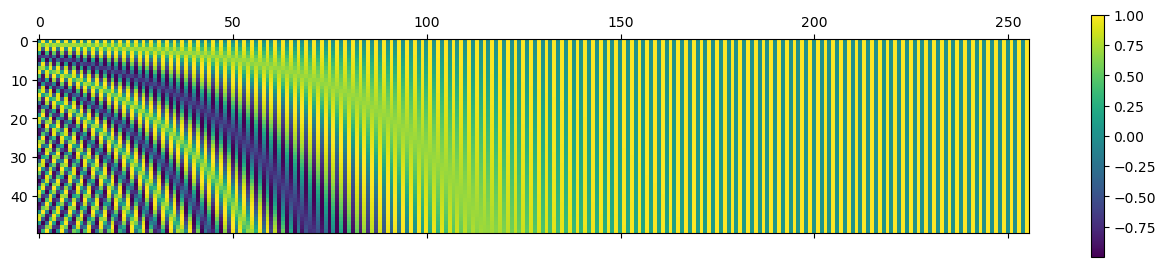

In [6]:
positionalMatrix = encodePositions(50, 256)
fig = plt.matshow(positionalMatrix)
plt.gcf().colorbar(fig)

# Self-Attention

### Explanation of the Code

1. **Importing Required Libraries**:
   - **`from bertviz.transformers_neuron_view import BertModel, BertTokenizer`**: 
     - **`BertModel`**: This is the class for loading the BERT model for visualization in the **BertViz** library. It allows for viewing the attention of the model in detail.
     - **`BertTokenizer`**: This is the tokenizer used to tokenize input text in a format that can be processed by the BERT model.

   - **`from bertviz.neuron_view import show`**: 
     - **`show`**: This function is used to visualize the attention patterns of the BERT model. It helps display how the model attends to different parts of the input text during processing.

2. **Loading the Tokenizer and Model**:
   - **`tokenizer_viz = BertTokenizer.from_pretrained(modelName)`**:
     - This loads the **BERT tokenizer** for the specified `modelName` (which should be defined elsewhere as something like `bert-base-uncased`). It is responsible for preparing the input text for the model.
   
   - **`model_viz = BertModel.from_pretrained(modelName)`**:
     - This loads the **BERT model** (`bert-base-uncased` or whatever model is specified). The model is pre-trained and ready to visualize attention heads.

3. **Visualizing the Attention**:
   - **`show(model_viz, "bert", tokenizer_viz, "I read a good novel.", display_mode="light", head=11)`**:
     - **`show()`**: This function generates a visualization of the attention mechanisms in the BERT model. It visualizes how different tokens attend to each other during the processing of the input text.
     - **`model_viz`**: The pre-trained BERT model to visualize.
     - **`"bert"`**: Specifies that the visualization is for a BERT model.
     - **`tokenizer_viz`**: The tokenizer used to tokenize the input sentence.
     - **`"I read a good novel."`**: The input sentence that will be tokenized and passed through the model.
     - **`display_mode="light"`**: The visualization mode, which changes the appearance of the visualization (light or dark theme).
     - **`head=11`**: Specifies which attention head to visualize (here, head 11). Each head in BERT focuses on different aspects of the sentence, and visualizing specific heads helps understand how the model is attending to different parts of the sentence.

### Summary
This code uses the **BertViz** library to visualize the attention patterns of the **BERT model**. It loads the tokenizer and model, then uses the `show` function to display how attention is distributed across different words in the sentence `"I read a good novel."` by visualizing the attention in a specific head of the BERT model. This helps understand the inner workings of BERT by showing which parts of the sentence the model focuses on during processing.


In [17]:
from bertviz.transformers_neuron_view import BertModel, BertTokenizer
from bertviz.neuron_view import show

# Initialize the model and tokenizer
modelName = "bert-base-uncased"  # You can change this if you are using a different model
tokenizer_viz = BertTokenizer.from_pretrained(modelName)
model_viz = BertModel.from_pretrained(modelName)

# Visualize the attention mechanism for the given text with head=11
show(model_viz, "bert", tokenizer_viz, "I read a good novel.", display_mode="light", head=11)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Explanation of the Code

1. **Visualizing the Attention with BertViz**:
   - **`show(model_viz, "bert", tokenizer_viz, "Attention is a novel idea.", display_mode="light", head=11)`**:
     - **`show()`**: This function from the **BertViz** library generates a visualization of the **attention mechanisms** in the BERT model. It helps visualize how different tokens attend to each other in the model's processing pipeline.
     - **`model_viz`**: The pre-trained BERT model to be visualized. It has already been loaded with the model's weights.
     - **`"bert"`**: Specifies the type of model being used (in this case, BERT). This argument tells the `show` function which model architecture to visualize.
     - **`tokenizer_viz`**: The tokenizer that converts the input sentence into tokens that the BERT model can process.
     - **`"Attention is a novel idea."`**: The input text that will be tokenized and fed into the BERT model for attention visualization. This sentence will be analyzed to show how the model attends to different parts of the sentence.
     - **`display_mode="light"`**: Sets the visual appearance of the attention map, choosing a **light mode** theme for the display.
     - **`head=11`**: Specifies which attention head to visualize. Each attention head in BERT focuses on different aspects of the sentence, and by specifying `head=11`, the code visualizes the attention distribution of the 11th head specifically.

### Summary
This code uses **BertViz** to visualize how a specific **BERT attention head** (head 11) focuses on different words in the sentence `"Attention is a novel idea."`. It helps us understand how the BERT model processes the sentence and which words are attended to more in each layer of the model. The visualization is shown in **light mode** to make the display easier to interpret.


In [8]:
show(model_viz, "bert", tokenizer_viz, "Attention is a novel idea.", display_mode="light", head=11)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# GPT2 model (137M parameters)

### Explanation of the Code

1. **Importing the Pipeline from Hugging Face**:
   - **`from transformers import pipeline`**: This imports the `pipeline` function from the Hugging Face **Transformers** library. The `pipeline` is a high-level API that allows easy access to pre-trained models for various tasks like text generation, sentiment analysis, translation, etc.

2. **Initializing the Text Generation Pipeline**:
   - **`generator = pipeline('text-generation', model='gpt2')`**:
     - **`pipeline('text-generation')`**: This initializes a **text generation pipeline**, which is designed to generate human-like text given an input prompt.
     - **`model='gpt2'`**: This specifies that the **GPT-2 model** (a pre-trained language model from OpenAI) will be used for text generation. GPT-2 is known for generating coherent and contextually relevant text based on the input prompt.

3. **Generating Text Based on the Input**:
   - **`generator("I read a good novel.", max_length=30, num_return_sequences=5)`**:
     - **`"I read a good novel."`**: This is the input text or prompt provided to the GPT-2 model. The model will generate text based on this input.
     - **`max_length=30`**: This limits the generated text to a maximum of **30 tokens** (words or subwords). This ensures that the generated text is not too long.
     - **`num_return_sequences=5`**: This specifies that **5 different sequences** of text should be generated based on the input prompt. GPT-2 will produce 5 different continuations of the sentence, each offering a unique output.

### Summary
This code uses the **Hugging Face Transformers library** to initialize a **text generation pipeline** with the **GPT-2 model**. The model generates 5 different text sequences based on the input prompt `"I read a good novel."`, each with a maximum length of 30 tokens. GPT-2 generates human-like text continuations, and this setup allows for multiple variations of the generated text to be returned.


In [14]:
from transformers import pipeline, logging

# Suppress logging output for cleaner result
logging.set_verbosity_error()  # Correctly suppress the warnings from Hugging Face

# Initialize the text generation pipeline with GPT-2 model
generator = pipeline('text-generation', model='gpt2')

# Generate text based on the prompt
output = generator("I read a good novel.", max_length=30, num_return_sequences=5)

# Cleaned-up and formatted output
for idx, generated_text in enumerate(output):
    print(f"Generated Text {idx + 1}:")
    print(generated_text['generated_text'])
    print("\n" + "="*50 + "\n")


Generated Text 1:
I read a good novel.

I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money.

I have no money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money.

I have no money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money.

I have no money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don't have any money. I don


Generated Text 2:
I read a good novel. I love it. I read a lot of books. I love my family. I love my kids.

### Explanation of the Code

1. **Generating Text with GPT-2**:
   - **`generator("This movie seemed really long.", max_length=300, num_return_sequences=5)`**:
     - **`"This movie seemed really long."`**: This is the input prompt provided to the GPT-2 model. The model will generate text that logically follows this prompt.
     - **`max_length=300`**: This specifies the maximum length of the generated text. In this case, the text will be generated up to a **maximum of 300 tokens** (which can be words or subwords).
     - **`num_return_sequences=5`**: This requests that the model generate **5 different sequences** of text based on the input prompt. GPT-2 will provide 5 separate, unique continuations of the sentence, each potentially offering different interpretations or directions.

### Summary
This code uses the **Hugging Face Transformers** library and the **GPT-2 model** to generate 5 different continuations of the input prompt `"This movie seemed really long."`, each with a maximum length of 300 tokens. GPT-2 will generate text that flows naturally from the input, and by specifying multiple sequences, you get diverse results for the same input prompt.


In [15]:
from transformers import pipeline, logging

# Suppress logging output for cleaner result
logging.set_verbosity_error()

# Initialize the text generation pipeline with GPT-2 model
generator = pipeline('text-generation', model='gpt2')

# Generate text based on the prompt
output = generator("This movie seemed really long.", max_length=300, num_return_sequences=5)

# Cleaned-up and formatted output
for idx, generated_text in enumerate(output):
    print(f"Generated Text {idx + 1}:")
    print(generated_text['generated_text'])
    print("\n" + "="*50 + "\n")


Generated Text 1:
This movie seemed really long. Not only was there so many different endings, there were some that I couldn't quite follow. But I liked it.

I think you can say that the cast and crew were very supportive of this movie.

Absolutely.

I don't think that's a fair comparison. It's not a film that was made by you.

Yes, I did.

And it's going to be great to have you in the cast.

Yes, I do.

But I would like to do a little bit more of the musical score.

Yes, yes.

Oh, yeah.

If you are excited to do it, what's the next project you would like to do that you will always love and love doing?

[laughs] I'd love to do a little bit more of an orchestra. I think I would love to play with other people who play with us, and it would be great.

You've been doing some other movies with the same band for a while now. What was the first idea you had for one of those?

[laughs] I hadn't really thought about it.

I did. I thought it was too much fun. So, I


Generated Text 2:
This movie

### Explanation of the Code

1. **Generating Text with GPT-2**:
   - **`generator("Star Trek", max_length=100, num_return_sequences=5)`**:
     - **`"Star Trek"`**: This is the input prompt provided to the GPT-2 model. The model will generate text that logically follows from this short prompt. In this case, it’s expected to generate text related to "Star Trek", potentially expanding on the theme or providing related context.
     - **`max_length=100`**: This specifies the maximum length of the generated text. The model will generate text up to a maximum of **100 tokens** (which could be words or subwords).
     - **`num_return_sequences=5`**: This requests that **5 different sequences** of text be generated based on the same input prompt. GPT-2 will provide 5 unique continuations, offering different takes on the prompt "Star Trek".

### Summary
This code uses the **Hugging Face Transformers** library to initialize a **text generation pipeline** with the **GPT-2 model**. It generates 5 unique continuations based on the prompt `"Star Trek"`, each up to 100 tokens long. This allows you to see multiple creative responses or directions that the model can take when interpreting the prompt.


In [16]:
from transformers import pipeline

# Initialize the text generation pipeline with GPT-2 model
generator = pipeline('text-generation', model='gpt2')

# Generate text with improved creativity and randomness
output = generator("Star Trek", max_length=100, num_return_sequences=5, temperature=0.7, top_p=0.9)

# Cleaned-up and formatted output
for idx, generated_text in enumerate(output):
    print(f"Generated Text {idx + 1}:")
    print(generated_text['generated_text'])
    print("\n" + "="*50 + "\n")


Generated Text 1:
Star Trek: The Next Generation Companion; The Enterprise-D; The Expanse; Star Trek: The Next Generation Companion; The Original Series; The Original Series; Star Trek: The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Series; The Original Ser

### Conclusion

In this lab, we learned the following key concepts and techniques:

1. **Tokenization**:
   - We explored how **BERT** and **GPT-2** handle tokenization differently using their respective tokenizers (**WordPiece** for BERT and **BPE** for GPT-2).
   - We learned how raw text is broken down into smaller units (tokens) that the model can process, and the importance of tokenization in enabling models to understand text.

2. **Self-Attention Mechanism**:
   - We studied the **self-attention mechanism** that is central to the Transformer architecture. 
   - We compared **BERT's bidirectional attention** and **GPT-2's unidirectional attention**, and understood how these mechanisms allow models to capture relationships between words in a sentence, regardless of their position.

3. **Text Generation**:
   - We learned how **GPT-2** generates text based on a given prompt, producing coherent, human-like text.
   - We also discussed **BERT's role in understanding text** and how it can be fine-tuned for tasks like **question answering** and **text completion**, but it is not designed for generating text like GPT-2.

By the end of this lab, we gained hands-on experience in working with tokenization, self-attention, and text generation, providing a solid foundation for further exploration of transformer models like **BERT** and **GPT-2**.
